# Table of Contents <a id="TOC"></a>
- [Scaling](#scaling)
- [Normalization](#normalization)
- [Practice Scaling](#practice-scaling)
- [Practice Normalization](#practice-normalization)

In [2]:
import numpy as np
import pandas as pd

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

In [3]:
# read the data
kickstarters_2017 = pd.read_csv("data/ks-projects-201801.csv")

## Scaling <a id="scaling"></a>
[TOC](#TOC)

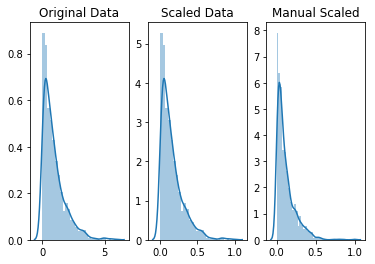

In [12]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 3)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

# testing out scaling the data myself
test = (original_data - original_data.min()) / (original_data.max() - original_data.min())
sns.distplot(test, ax=ax[2])
ax[2].set_title("Manual Scaled")

None

## Normalization <a id="normalization"></a>
[TOC](#TOC)

>In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes.

In [19]:
sns.distplot?

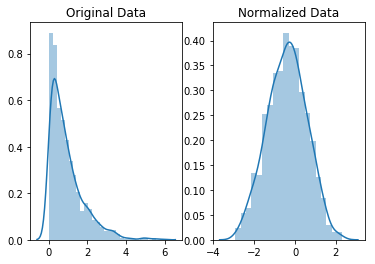

In [13]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized Data")

None

>For the following example, decide whether scaling or normalization makes more sense.

>You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week. You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?

>>I'm thinking of normalizing here because that's what the blurb about normalization said to do but it doesn't seem correct to me. It's probably because I' not sure what goes into building that linear regression model.

>You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?

>>I would totally scale the jumping jacks and push-ups.

## Practice Scaling <a id="practice-scaling"></a>
[TOC](#TOC)

In [21]:
kickstarters_2017.shape

(378661, 15)

In [20]:
kickstarters_2017.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


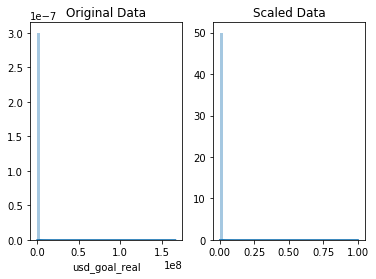

In [30]:
# select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns=[0])

# plot the original & scaled data together to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")
None

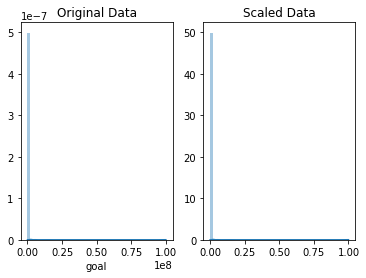

In [32]:
# grabbing the goal data
goal = kickstarters_2017.goal

scaled_goal = minmax_scaling(goal, columns=[0])

# plot the original & scaled data together to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_goal, ax=ax[1])
ax[1].set_title("Scaled Data")
None

## Practice Normalization <a id="practice-normalization"></a>
[TOC](#TOC)

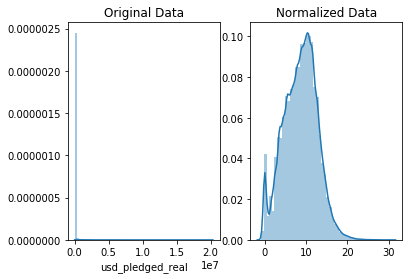

In [35]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indices)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot the original & scaled data together to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized Data")
None

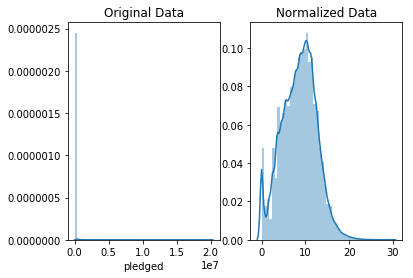

In [39]:
positive_pledged = kickstarters_2017.pledged[kickstarters_2017.pledged > 0]
normalized_pledged = stats.boxcox(positive_pledged)[0]
fig, ax = plt.subplots(1, 2)
sns.distplot(positive_pledged, ax=ax[0])
sns.distplot(normalized_pledged, ax=ax[1])
ax[0].set_title("Original Data")
ax[1].set_title("Normalized Data")
None